<a href="https://colab.research.google.com/github/benjamin-20/Sales_analytics/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The notebook is to perform Sales simulation training and find some analytical insights to the dataset. The dataset originally was written by María Carina Roldán, Pentaho Community Member, BI consultant (Assert Solution), Argentina. This Data is licensed under the Creative Commons Attribution-Noncommercial-Share Alike 3.0 Unported license.

# **Data Preparation**
We need to perform some data processing, filtering and sorting.

In [1]:
!pip install -U kaleido

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Set the encoding to handle non-UTF-8 characters
import os
os.environ['PYTHONIOENCODING'] = 'cp1252'

# Load the CSV file using the correct encoding
sales_data = pd.read_csv('/content/sales_data_sample.csv', encoding='cp1252')

# Print the first few rows of the DataFrame
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
#Get the shape of the data
sales_data.shape

(2823, 25)

In [5]:
#data info
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
#statistical numberic column
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
#we check for dublicates values
sales_data.duplicated(keep='first').sum()

0

In [8]:
#we check for missing values
sales_data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In the above analysis, we can see that 4 of the columns have missing values in them (columns: ADDRESSLINE2, STATE, POSTALCODE, TERRITORY). In this case, we have options either to replace the missing values, or remove them or we just ignore them. Remember that the columns with the missing values are not considered crucial yet at this point to our analysis.

In [9]:
#let's continue and chech for how many uniques values are there in the column
unique_counts = sales_data.apply(lambda col: col.nunique())
for col, count in unique_counts.items():
    print(f'Number of {col} unique values: {count}')


Number of ORDERNUMBER unique values: 307
Number of QUANTITYORDERED unique values: 58
Number of PRICEEACH unique values: 1016
Number of ORDERLINENUMBER unique values: 18
Number of SALES unique values: 2763
Number of ORDERDATE unique values: 252
Number of STATUS unique values: 6
Number of QTR_ID unique values: 4
Number of MONTH_ID unique values: 12
Number of YEAR_ID unique values: 3
Number of PRODUCTLINE unique values: 7
Number of MSRP unique values: 80
Number of PRODUCTCODE unique values: 109
Number of CUSTOMERNAME unique values: 92
Number of PHONE unique values: 91
Number of ADDRESSLINE1 unique values: 92
Number of ADDRESSLINE2 unique values: 9
Number of CITY unique values: 73
Number of STATE unique values: 16
Number of POSTALCODE unique values: 73
Number of COUNTRY unique values: 19
Number of TERRITORY unique values: 3
Number of CONTACTLASTNAME unique values: 77
Number of CONTACTFIRSTNAME unique values: 72
Number of DEALSIZE unique values: 3


In [10]:
# change ORDERDATE to pandas datatime for mat
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])

In [11]:
# sort the data by order date
sales_data.sort_values(by=['ORDERDATE'], inplace = True)

In [12]:
#Index by ORDERDATE
sales_data.set_index('ORDERDATE', inplace = True)

In [13]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.00,3,5151.00,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2003-01-06,10100,50,67.80,2,3390.00,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2003-01-06,10100,22,86.51,4,1903.22,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
2003-01-06,10100,49,34.47,1,1689.03,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
2003-01-09,10101,45,31.20,3,1404.00,Shipped,1,1,2003,Vintage Cars,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small


In [14]:
sales_data.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2005-05-31,10425,18,100.00,2,1895.94,In Process,2,5,2005,Trucks and Buses,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
2005-05-31,10425,33,100.00,4,4692.60,In Process,2,5,2005,Trucks and Buses,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
2005-05-31,10425,38,100.00,12,5894.94,In Process,2,5,2005,Classic Cars,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
2005-05-31,10424,44,61.41,2,2702.04,In Process,2,5,2005,Trucks and Buses,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2005-05-31,10425,38,99.41,7,3777.58,In Process,2,5,2005,Trucks and Buses,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium


**# Data Analysis**

In this section, we can start our data analysis to get insights fromt he dataset


In [15]:
top_country = sales_data.groupby(['COUNTRY']).sum().sort_values(by=['SALES'], ascending=False).head(10)
top_country = top_country[['SALES']].round(3)
top_country.reset_index(inplace=True)
top_country.head()


,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46


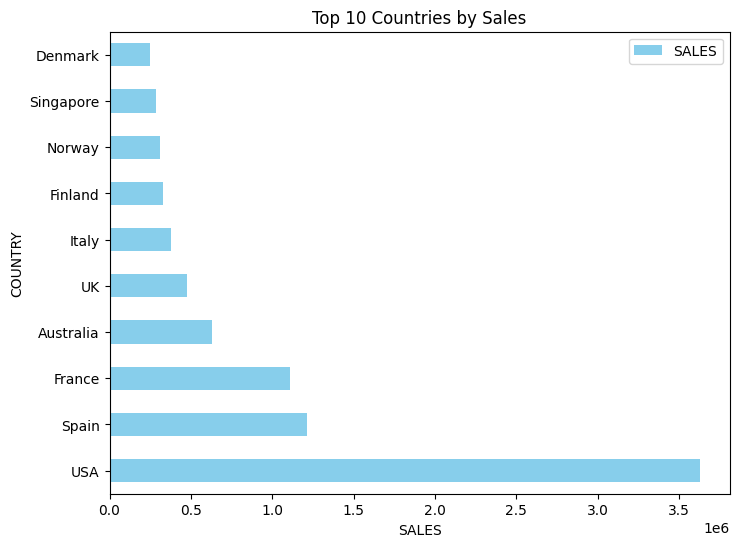

In [16]:
ax = top_country.plot.barh(x='COUNTRY', y='SALES', figsize=(8,6), color="skyblue", rot=0)
ax.set_title('Top 10 Countries by Sales')
ax.set_xlabel('SALES')
ax.set_ylabel('COUNTRY');

Fron the graph, we could notice that the top sales come from USA, Spain, France

The next step, we want to look at sales in the top cities.

In [17]:
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [18]:
top_city_sales = sales_data.groupby(by=['CITY']).sum().sort_values('SALES', ascending =False).head(10)
top_city_sales = top_city_sales[['SALES']].round(3)
top_city_sales.reset_index(inplace = True)
top_city_sales.head()

,CITY,SALES
0,Madrid,1082551.44
1,San Rafael,654858.06
2,NYC,560787.77
3,Singapore,288488.41
4,Paris,268944.68


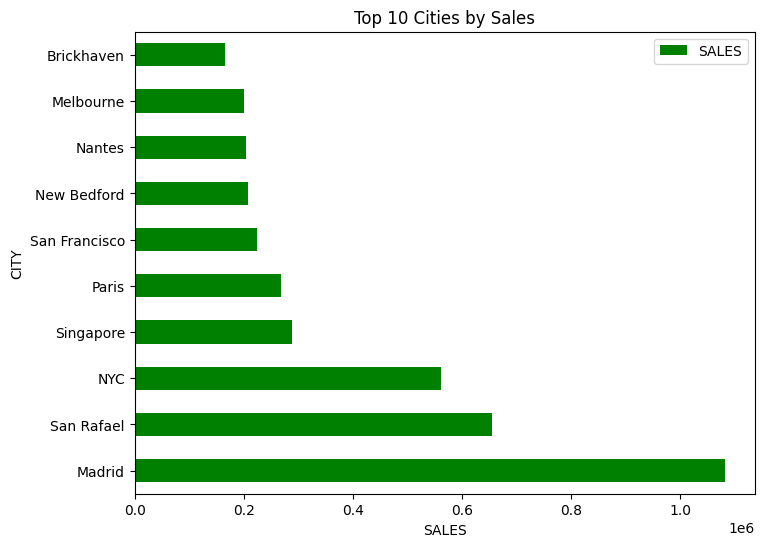

In [19]:
ax = top_city_sales.plot.barh(x='CITY', y='SALES', figsize=(8,6), color="green", rot=0)
ax.set_title('Top 10 Cities by Sales')
ax.set_xlabel('SALES')
ax.set_ylabel('CITY');

So, from the above visualization, we can consider Madrid, San Rafael and NYC as the top cities with high sales.

The next analysis that we can to explore is the top customer

In [20]:
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [21]:
top_customer = sales_data.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(10)
top_customer = top_customer[['SALES']].round(3)
top_customer.reset_index(inplace=True)
top_customer.head(10)

,CUSTOMERNAME,SALES
0,Euro Shopping Channel,912294.11
1,Mini Gifts Distributors Ltd.,654858.06
2,"Australian Collectors, Co.",200995.41
3,Muscle Machine Inc,197736.94
4,La Rochelle Gifts,180124.90
5,"Dragon Souveniers, Ltd.",172989.68
6,Land of Toys Inc.,164069.44
7,The Sharp Gifts Warehouse,160010.27
8,"AV Stores, Co.",157807.81
9,"Anna's Decorations, Ltd",153996.13


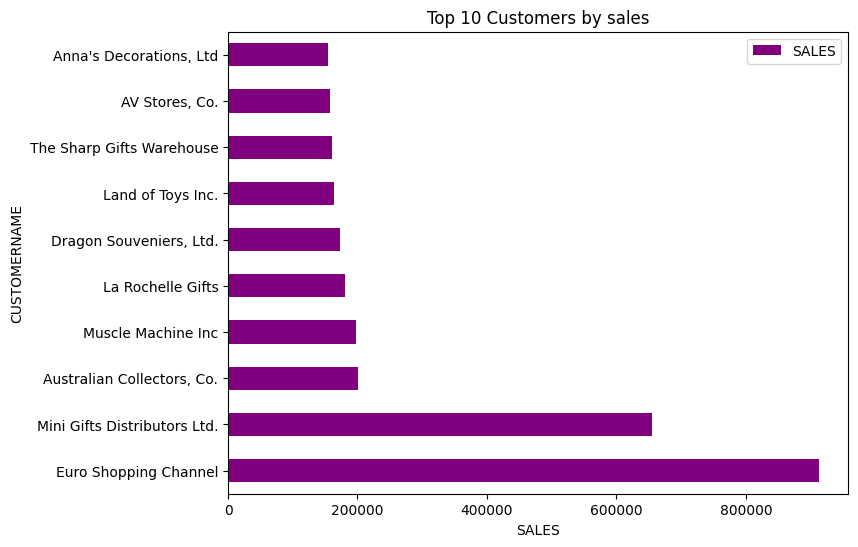

In [22]:
ax = top_customer.plot.barh(x='CUSTOMERNAME', y='SALES', figsize=(8,6), color="purple", rot=0)
ax.set_title("Top 10 Customers by sales")
ax.set_xlabel('SALES')
ax.set_ylabel('CUSTOMERNAME');

Our visualization analysis shows that Euro Shopping Channel, Mini Gifts Distributors Ltd., Australian Collectors, Co. are the top customers by sales

Next, we will check the top Products by revenues generated.

In [23]:
top_products_revenues = sales_data.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False).head(10)
top_products_revenues = top_products_revenues[['SALES']]
top_products_revenues.head()

,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Vintage Cars,1903150.84
Motorcycles,1166388.34
Trucks and Buses,1127789.84
Planes,975003.57


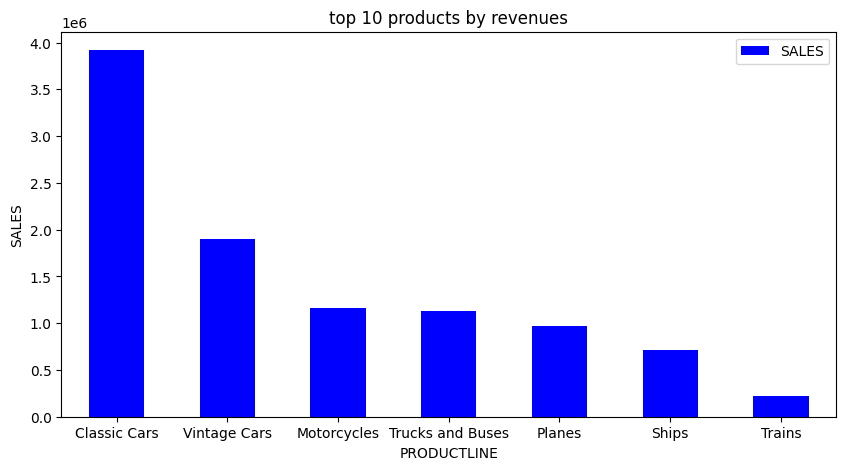

In [24]:
ax = top_products_revenues.plot.bar(figsize=(10, 5), color="blue", rot=0)
ax.set_title("top 10 products by revenues")
ax.set_xlabel('PRODUCTLINE')
ax.set_ylabel('SALES');

From the visualization, we can clearly see that Classic cars, Vintage Cars and Motorcycles are the top products by revenue generations.

Next is we are going to check the sales over the pass 3 years.

In [25]:
year_sales = sales_data.groupby(['YEAR_ID']).sum().sort_values('SALES', ascending=False)
year_sales = year_sales[['SALES']]
year_sales

,SALES
YEAR_ID,
2004,4724162.60
2003,3516979.54
2005,1791486.71


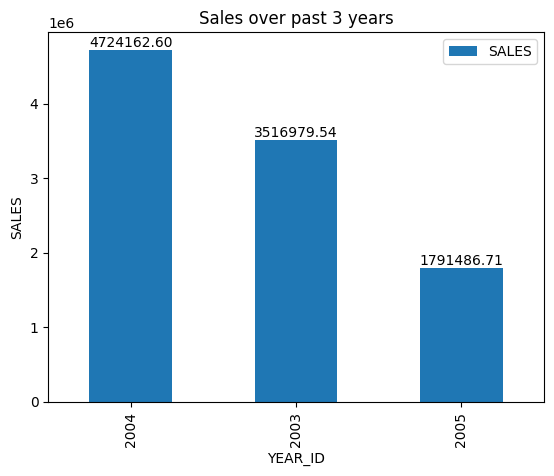

In [26]:
year_sales = sales_data.groupby(['YEAR_ID']).sum().sort_values('SALES', ascending=False)

top_sales_years = year_sales[['SALES']]

ax = top_sales_years.plot.bar()

ax.set_title("Sales over past 3 years")
ax.set_xlabel('YEAR_ID')
ax.set_ylabel('SALES')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

It is evident that, over the past 3 years, year 2004 had the most sales, followed by 2003 adn 2005 being the last.

Let's check now the top months with thier sales

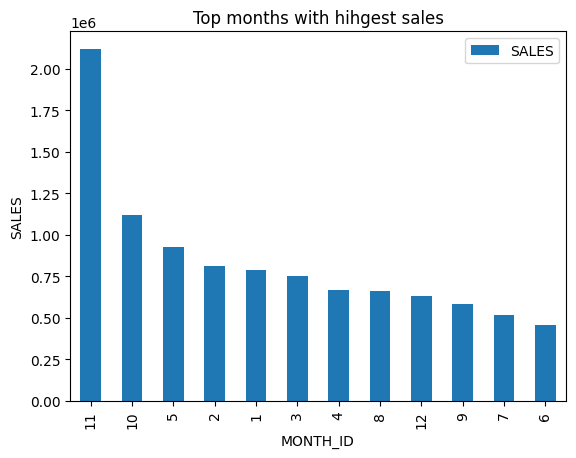

In [27]:
month_sales = sales_data.groupby(['MONTH_ID']).sum().sort_values(by='SALES', ascending = False)
month_sales = month_sales[['SALES']]
ax = month_sales.plot.bar()
ax.set_title("Top months with hihgest sales")
ax.set_xlabel('MONTH_ID')
ax.set_ylabel('SALES');

From this visualization, November, October and May are the top months with the highest sales.